# **Netflix Exploratory Data analysis**

# Import Libraries and Load Data

In [2]:
# Import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Kaggle\netflix-rotten-tomatoes-metacritic-imdb.csv')
df.head(2)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube


# Data Preparation and Cleaning

In [4]:
# Lets begin by observing diferrent kinds of data using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [5]:
# Check for missing values
df.isnull().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1954
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

In [6]:
# Drop the columns that we are not going to use
df.drop(columns  = ['Metacritic Score', 'Boxoffice', 'Production House', 'Netflix Link', 'IMDb Link',
        'Poster', 'TMDb Trailer', 'Trailer Site'], axis = 1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Awards Received        6075 non-null   float64
 15  Aw

In [8]:
# Crevte an id 
start = 1
df.insert(0, 'ID', range(start, start+df.shape[0]))

In [9]:
# Handle the missing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3079 entries, 0 to 15463
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3079 non-null   int64  
 1   Title                  3079 non-null   object 
 2   Genre                  3079 non-null   object 
 3   Tags                   3079 non-null   object 
 4   Languages              3079 non-null   object 
 5   Series or Movie        3079 non-null   object 
 6   Hidden Gem Score       3079 non-null   float64
 7   Country Availability   3079 non-null   object 
 8   Runtime                3079 non-null   object 
 9   Director               3079 non-null   object 
 10  Writer                 3079 non-null   object 
 11  Actors                 3079 non-null   object 
 12  View Rating            3079 non-null   object 
 13  IMDb Score             3079 non-null   float64
 14  Rotten Tomatoes Score  3079 non-null   float64
 15  Awards R

In [10]:
df.head(2)

,ID,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,...,View Rating,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image
0,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,...,R,7.9,98.0,74.0,57.0,12 Dec 2008,2021-03-04,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
15,16,Joker,"Crime, Drama, Thriller","Dark Comedies,Crime Comedies,Dramas,Comedies,C...",English,Movie,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Todd Phillips,...,R,8.4,68.0,112.0,228.0,04 Oct 2019,2021-03-03,A practical jokers fake kidnapping at a bachel...,951938.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


# Exploratory Data analysis and Visualization

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


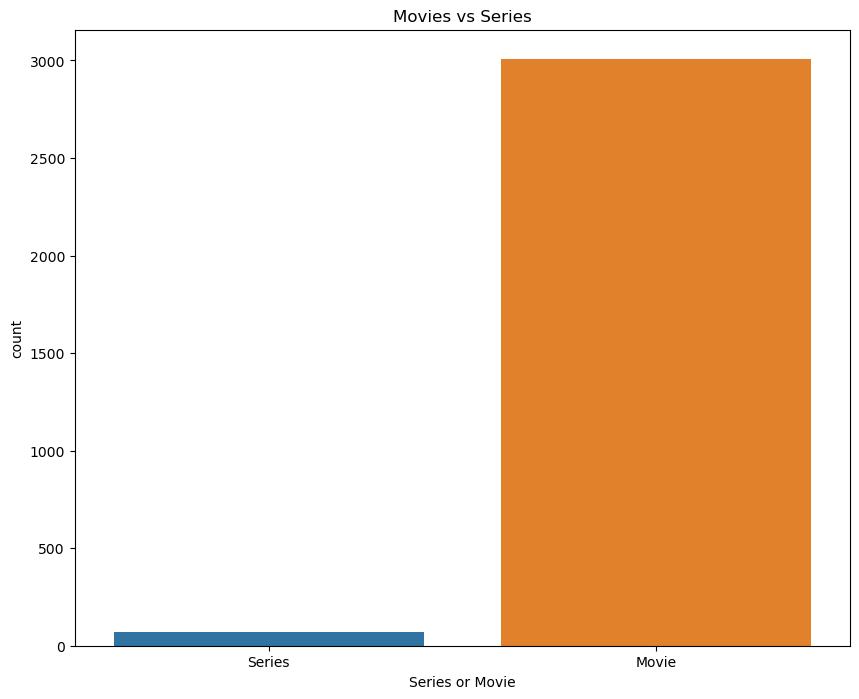

In [11]:
# Barplot
plt.figure(figsize=(10,8))
plt.title("Movies vs Series")

sns.countplot(x = df['Series or Movie'])
plt.show()

In [12]:
# Divide our data into  movie 
df_movies = df[df['Series or Movie'] == 'Movie']
df_movies.head(1)

,ID,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,...,View Rating,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image
15,16,Joker,"Crime, Drama, Thriller","Dark Comedies,Crime Comedies,Dramas,Comedies,C...",English,Movie,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Todd Phillips,...,R,8.4,68.0,112.0,228.0,04 Oct 2019,2021-03-03,A practical jokers fake kidnapping at a bachel...,951938.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


In [13]:
# Divide our data into series 
df_series = df[df['Series or Movie'] == 'Series']
df_series.head(1)

,ID,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,...,View Rating,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,Release Date,Netflix Release Date,Summary,IMDb Votes,Image
0,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,...,R,7.9,98.0,74.0,57.0,12 Dec 2008,2021-03-04,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...


In [14]:
# To watch series we filter using genre
df_series['Genre'].unique() # Different types of genre in series

array(['Crime, Drama, Fantasy, Horror, Romance', 'Comedy, Romance',
       'Action, Crime, Thriller', 'Action, Adventure, Fantasy, Sci-Fi',
       'Animation, Adventure, Family, Fantasy',
       'Comedy, Drama, Family, Romance', 'Drama', 'Adventure, Comedy',
       'Action, Sci-Fi, Thriller', 'Action, Mystery, Thriller',
       'Comedy, Drama, Romance', 'Biography, Drama, History',
       'Horror, Mystery', 'Drama, Romance', 'Comedy',
       'Biography, Crime, Drama', 'Action, Adventure, Sci-Fi, Thriller',
       'Mystery, Sci-Fi, Thriller', 'Action, Crime, Drama, Thriller',
       'Biography, Drama, History, Romance',
       'Adventure, Horror, Mystery, Thriller', 'Action, Drama, Thriller',
       'Adventure, Comedy, Drama', 'Action, Adventure, Horror, Sci-Fi',
       'Action, Drama, History, War',
       'Action, Adventure, Crime, Mystery, Thriller', 'Drama, Thriller',
       'Comedy, Drama, Fantasy, Romance, Sci-Fi',
       'Adventure, Comedy, Family, Fantasy', 'Comedy, Drama, Famil

In [15]:
# Top Genres in series
df_series_gen = df_series.dropna(subset = 'Genre')

In [16]:
series_gen_list = df_series_gen.Genre.str.split(',') 
s_gen_list = {} 

# Loop to create and seperate genres 

for genres in series_gen_list: 
    for genre in genres: 
        if (genre in s_gen_list): 
            s_gen_list[genre]+=1 
        else:  
            s_gen_list[genre]=1 

s_gen_df = pd.DataFrame(list(s_gen_list.values()), index=s_gen_list.keys(), columns=['Counts of Genres in Tv Series'])

s_gen_df.sort_values(by='Counts of Genres in Tv Series', ascending=False, inplace=True)
top_10_s_gen = s_gen_df.head(10)

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Top Genres in Series'}, ylabel='Counts of Genres in Tv Series'>

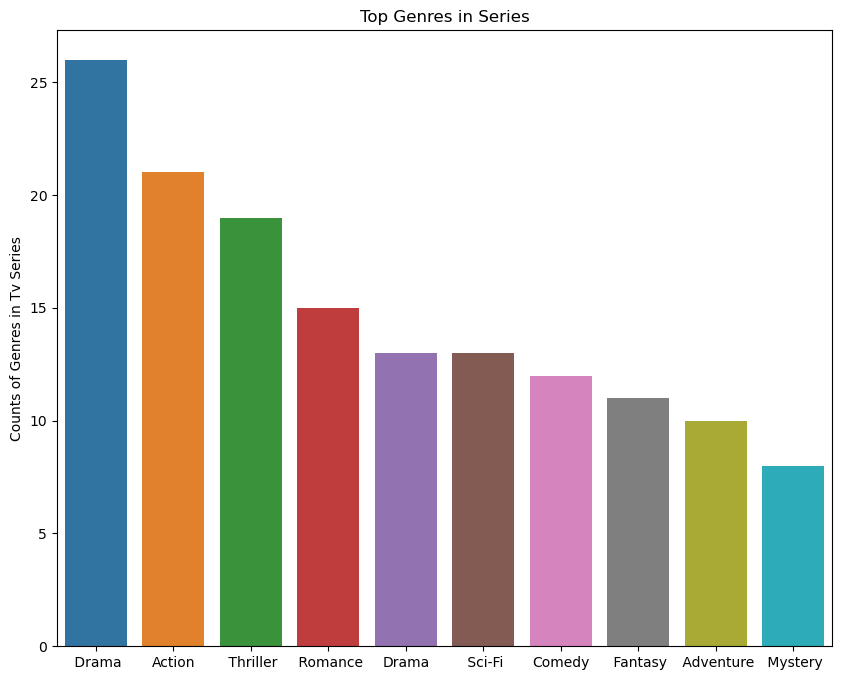

In [17]:
# Barplot
plt.figure(figsize=(10,8))
plt.title('Top Genres in Series')

sns.barplot(x = top_10_s_gen.index, y = top_10_s_gen['Counts of Genres in Tv Series'])

In [18]:
#Separate Genre on movies
df_movie_gen = df_movies.dropna(subset=['Genre']) 

movie_gen_list = df_movie_gen.Genre.str.split(', ') 

m_gen_list = {} 

#using loop in seperate genre and collect them  

for genres in movie_gen_list: 
    for genre in genres: 
        if (genre in m_gen_list): 
            m_gen_list[genre]+=1 
        else:  
            m_gen_list[genre]=1 

m_gen_df = pd.DataFrame(list(m_gen_list.values()), index=m_gen_list.keys(), columns=['Counts of Genres in Movies'])
m_gen_df.sort_values(by='Counts of Genres in Movies', ascending=False, inplace=True)

top_10_m_gen = m_gen_df.head(10)

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


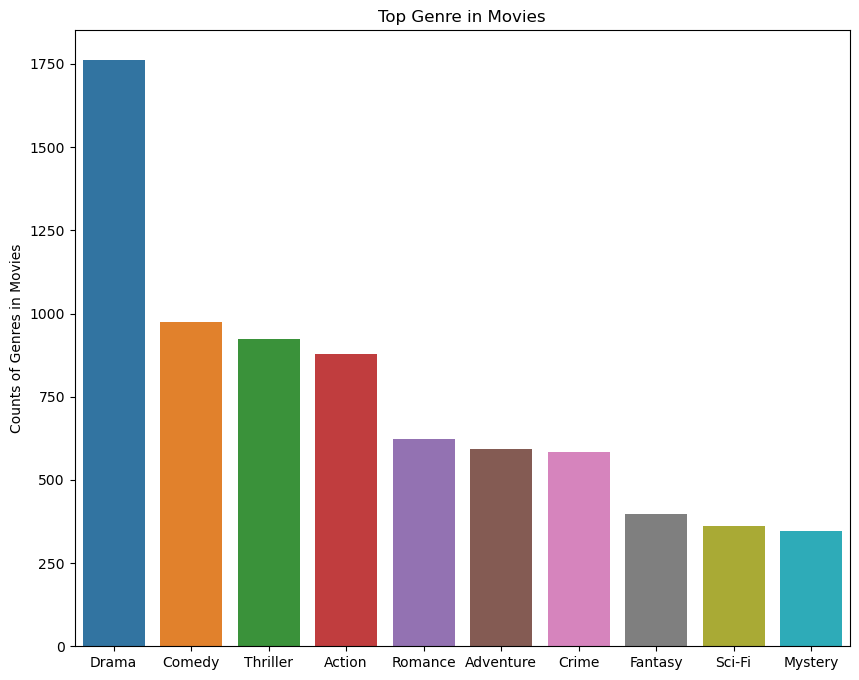

In [19]:
# Visualize the top Movie Genre
plt.figure(figsize=(10, 8))
plt.title('Top Genre in Movies')

sns.barplot(x=top_10_m_gen.index, y=top_10_m_gen['Counts of Genres in Movies'])
plt.show()

In [20]:
# Most popular movie lvnguage Languages
df_movies_lang  = df.dropna(subset= ['Languages'])

In [21]:
movie_lang_list = df_movies_lang.Languages.str.split(',')

m_lang_list = {}

for languages in movie_lang_list:
    for language in languages:
          if (language in m_lang_list): 
            m_lang_list[language]+=1
          
          else:  
            m_lang_list[language]=1 


m_lang_df = pd.DataFrame(list(m_lang_list.values()), index=m_lang_list.keys(), columns=['Counts of Languages in Movies'])
m_lang_df.sort_values(by='Counts of Languages in Movies', ascending=False, inplace=True)

top_10_lang_movies = m_lang_df.head(10)

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Top languages in movies'}, ylabel='Counts of Languages in Movies'>

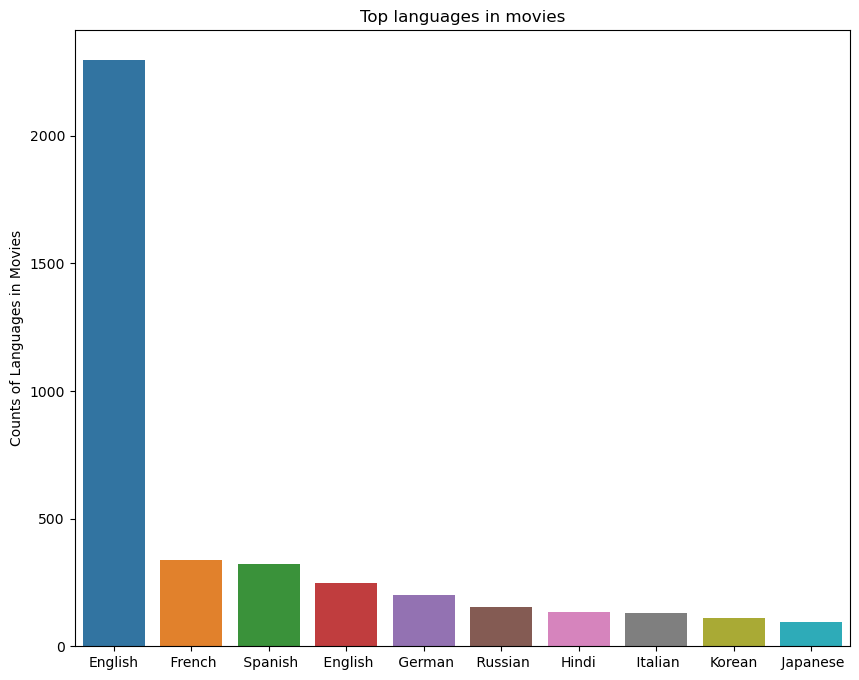

In [22]:
plt.figure(figsize=(10,8))
plt.title("Top languages in movies")

sns.barplot( x = top_10_lang_movies.index , y = top_10_lang_movies['Counts of Languages in Movies'])

In [23]:
df_series_lang = df.dropna(subset=['Languages'])

In [24]:
series_lang_list = df_series_lang.Languages.str.split(',')


s_lang_list = {}

for languages in series_lang_list:
    for language in languages:
        if (language in s_lang_list):
            s_lang_list[language] +=1
        else:
            s_lang_list[language] = 1

s_lang_df = pd.DataFrame(list(s_lang_list.values()), index=s_lang_list.keys(), columns=['Counts of Languages in Series'])
s_lang_df.sort_values(by='Counts of Languages in Series', ascending=False, inplace=True)

top_10_lang_series = s_lang_df.head(10)

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Top languages in series '}, ylabel='Counts of Languages in Series'>

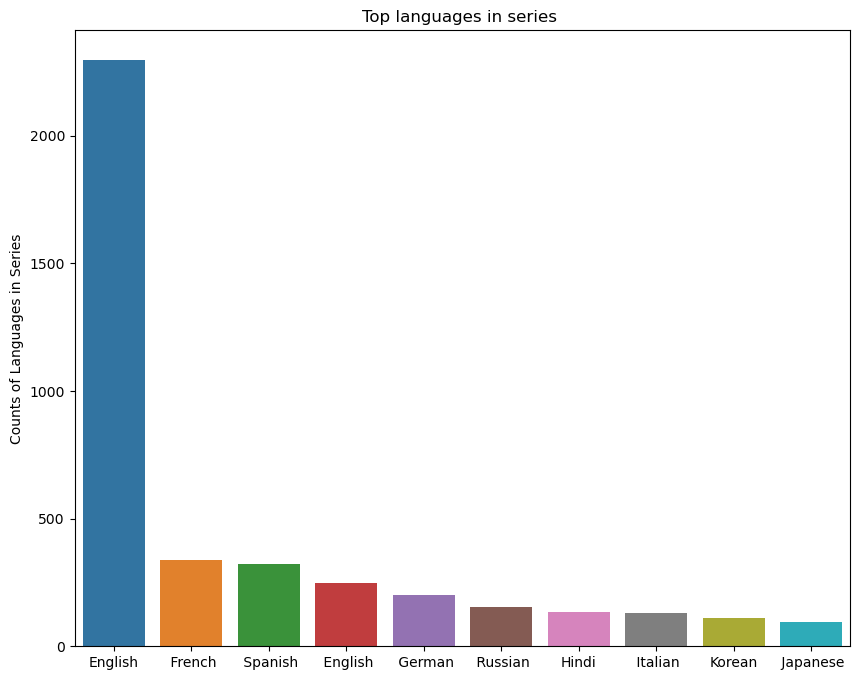

In [25]:
plt.figure(figsize=(10,8))
plt.title("Top languages in series ")

sns.barplot(x = top_10_lang_series.index , y = top_10_lang_series['Counts of Languages in Series'])

In [26]:
df_movie_imdb = df_movies.sort_values(by='IMDb Score',ascending=False)

top_10_movies_imdb = df_movie_imdb[:10]

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'top 10 movies according to IMDb'}, xlabel='Title', ylabel='IMDb Score'>

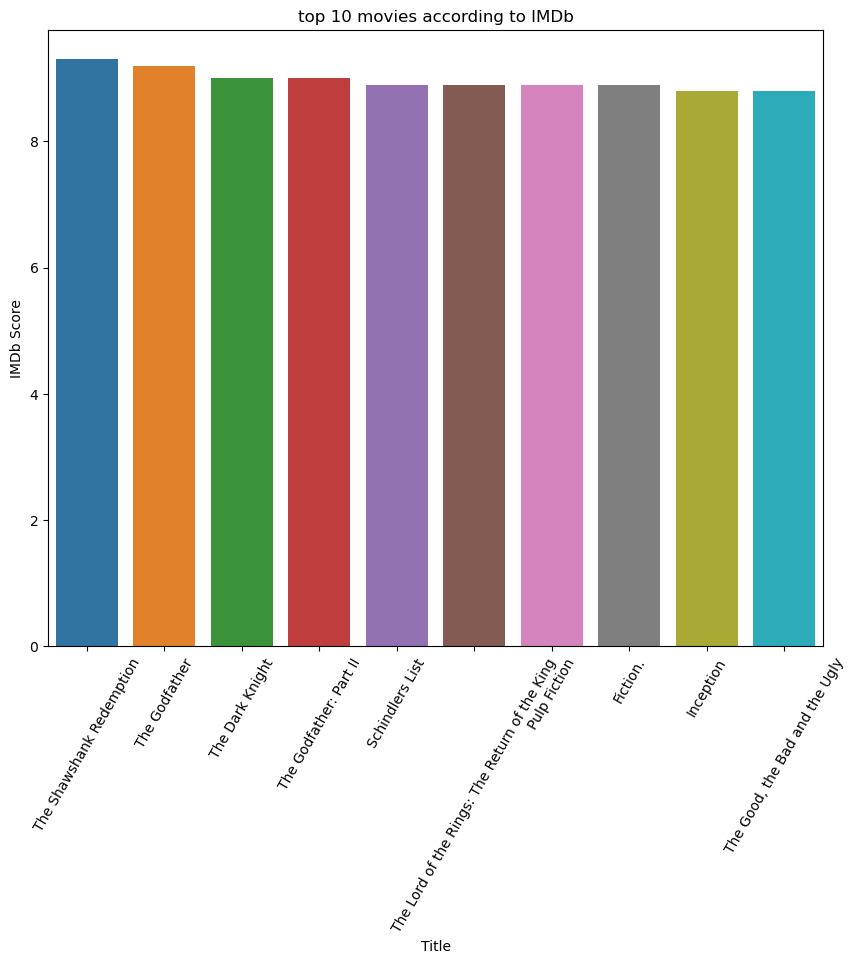

In [27]:
plt.figure(figsize=(10,8))
plt.title("top 10 movies according to IMDb")
plt.xticks(rotation = 60)
sns.barplot(x = top_10_movies_imdb['Title'] , y = top_10_movies_imdb['IMDb Score'])

In [28]:
df_series_imdb = df_series.sort_values(by='IMDb Score', ascending=False) 

top_10_series_imdb  = df_series_imdb[:10]

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Top ten Series in '}, xlabel='Title', ylabel='IMDb Score'>

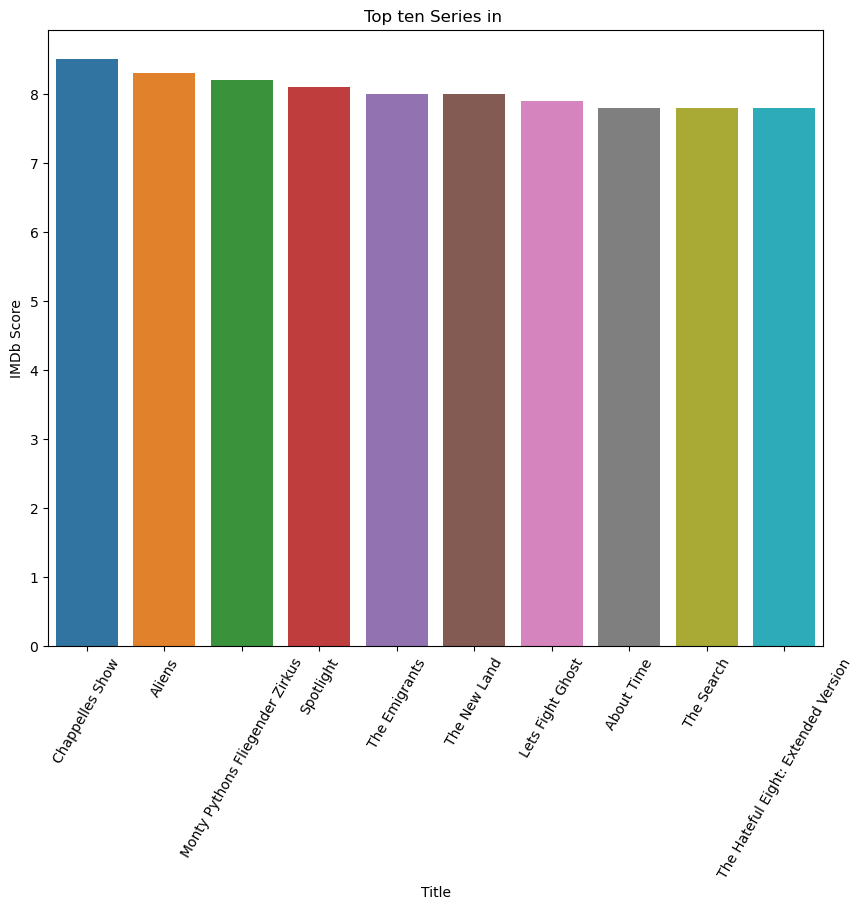

In [29]:
plt.figure(figsize=(10,8))
plt.title("Top ten Series in ")
plt.xticks(rotation = 60)

sns.barplot(x= top_10_series_imdb['Title'],y= top_10_series_imdb['IMDb Score'])

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Top ten movies according to Rotten Tomatoes '}, xlabel='Title', ylabel='Rotten Tomatoes Score'>

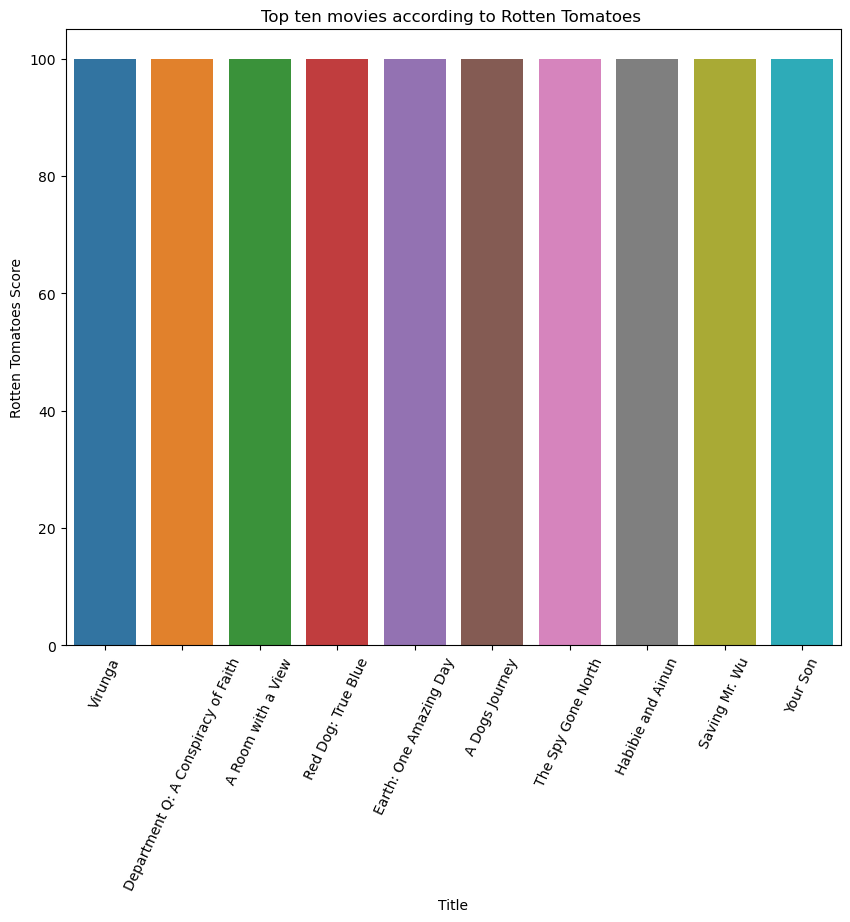

In [30]:
df_movie_rt = df_movies.sort_values(by= 'Rotten Tomatoes Score',ascending=False) 

top_10_movies_rt = df_movie_rt[:10]

plt.figure(figsize=(10,8))
plt.title("Top ten movies according to Rotten Tomatoes ")
plt.xticks(rotation = 65)

sns.barplot(x = top_10_movies_rt['Title'],y = top_10_movies_rt['Rotten Tomatoes Score'])

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Top ten series according to Rotten Tomatoes Score'}, xlabel='Title', ylabel='Rotten Tomatoes Score'>

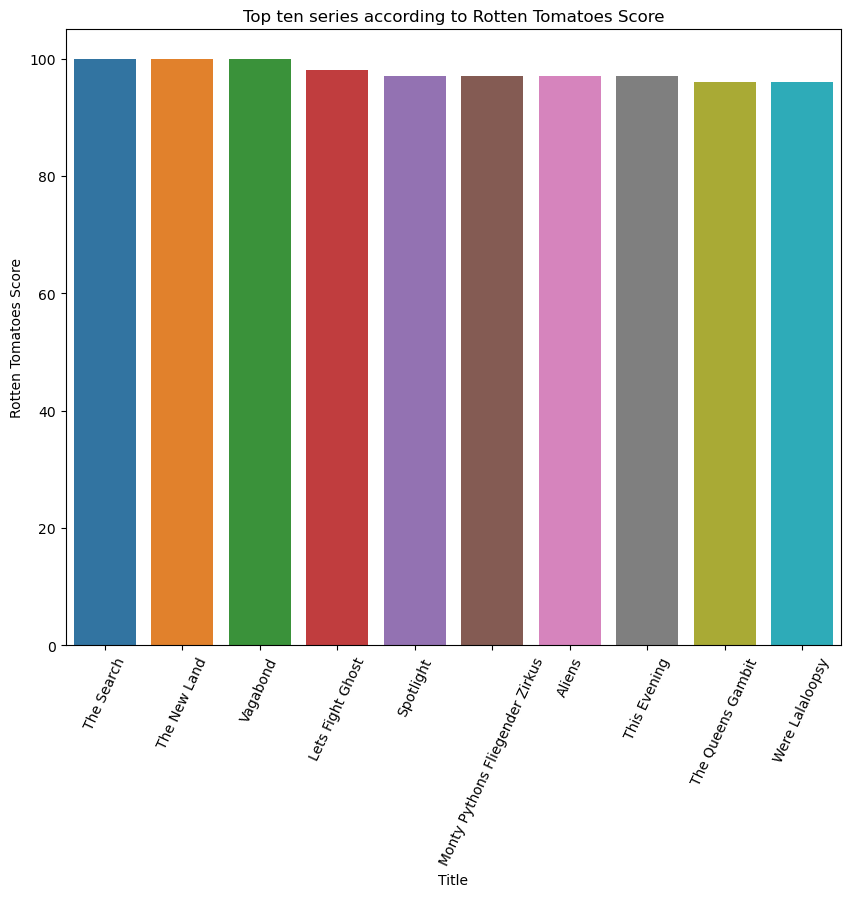

In [31]:
df_series_rt = df_series.dropna(subset=['Rotten Tomatoes Score']) 
df_series_rt = df_series_rt.sort_values(by = 'Rotten Tomatoes Score', ascending = False)

top_10_series_rt = df_series_rt[:10]


plt.figure(figsize=(10,8))
plt.title("Top ten series according to Rotten Tomatoes Score")
plt.xticks(rotation = 65)

sns.barplot(x= top_10_series_rt['Title'],y = top_10_series_rt['Rotten Tomatoes Score'])